#IRIS using Keras

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
30/30 [==============================] - 0s 19us/step
Final test set loss: 0.154330
Final test set accuracy: 96.666664
              precision    recall  f1-score   support

           0       1.00      1.00   

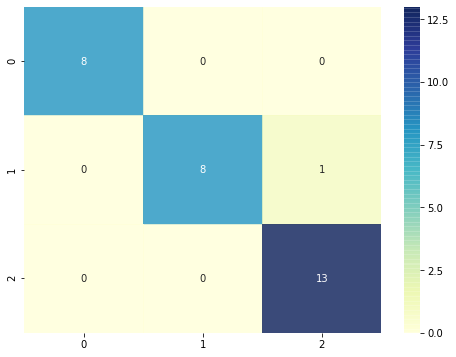

In [0]:

import numpy as np
import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
#print(iris_data.target)
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column
#print(y_)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False) #sparse set to true will return matrix
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=[4], activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))


model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(x_train, y_train, verbose=0, batch_size=5, epochs=200,validation_split=0.30)

# Test on unseen data

results = model.evaluate(x_test, y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]*100))



#predict
y_pred = model.predict_classes(x_test)

labels=np.argmax(y_test, axis=1)


def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)


print(classification_report(labels, y_pred))
plot_confusion_matrix(model, x_test, labels)

# Sonar Classification 
This is the data set used by Gorman and Sejnowski in their study of the classification of sonar signals using a neural network . The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock

In [0]:
# Binary Classification with Sonar Dataset: Standardized Larger
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# load dataset
dataframe = pd.read_csv("Sonar.csv")
dataset = dataframe.values
# split into input (X) and output (Y) variables
X_train = dataset[1:150,0:60].astype(float)
Y_train = dataset[1:150,60].astype(int)

X_test = dataset[150:,0:60].astype(float)
Y_test = dataset[150:,60].astype(int)

model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(45, activation='relu'))

model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, verbose=0, epochs=100)


FileNotFoundError: ignored

In [0]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.28      0.43        58
           1       0.00      0.00      0.00         0

    accuracy                           0.28        58
   macro avg       0.50      0.14      0.22        58
weighted avg       1.00      0.28      0.43        58



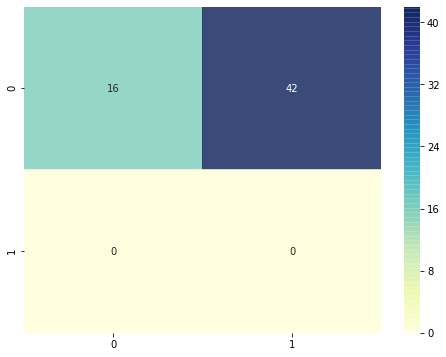

In [0]:
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred))
plot_confusion_matrix(model, X_test, Y_test)